# Missing Data Mechanism

The days since symptom onset (DSSO) appears to be causing not at random missingness. This is explored below by looking at the joint distributions of CT and DSSO, because of the potential confounding effect of DSSO on survival, when taking into account its interaction with CT.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir, makedirs
from os.path import isfile, join, exists

from scipy.stats import chi2_contingency, fisher_exact, pointbiserialr

%matplotlib inline
plt.rcParams['figure.dpi'] = 150

In [14]:
src_data_file = '../data/data.csv'
src_data = pd.read_csv(src_data_file, na_values='\\N')
sl_data = src_data[(src_data['ETUKey'] == 2) | (src_data['ETUKey'] == 4) | (src_data['ETUKey'] == 5)]
lb_data = src_data[(src_data['ETUKey'] == 1) | (src_data['ETUKey'] == 3)]

out_path = 'missmech'
if not exists(out_path):
        makedirs(out_path)

pred_vars = ['PatientAge', 'PatientSex', 'Fever', 
             'Headache', 'Vomit', 'Diarrhoea', 'HaemorrhagicEyes', 'Breathlessness', 'AnorexiaLossAppetite', 
             'AstheniaWeakness', 'AbdominalPain', 'Jaundice', 'SwallowingProblems', 'Hiccups', 
             'Bleeding', 'BoneMuscleJointPain', 'cycletime'
             'FeverNoDays', 'DaysSinceSymptomOnset', 'DaysSinceSymptomFeverOnset', 'ReferralTime']

0.3561643835616438
0.02247191011235955


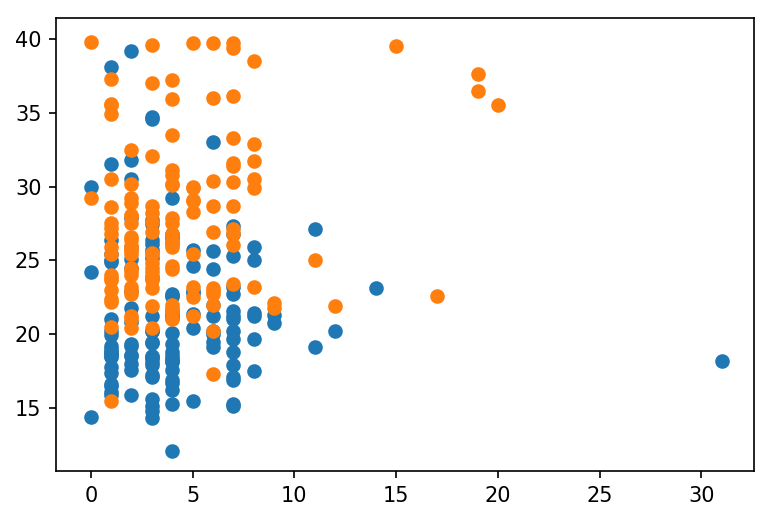

In [15]:
var = 'DaysSinceSymptomFeverOnset'
sl_mfrac = sl_data.isnull().sum() / len(sl_data)
lb_mfrac = lb_data.isnull().sum() / len(lb_data)

print(sl_mfrac[var])
print(lb_mfrac[var])

x = sl_data[var]
y = sl_data['cycletime']
plt.scatter(x, y)

x = lb_data[var]
y = lb_data['cycletime']
plt.scatter(x, y)

0.5787671232876712
0.02247191011235955


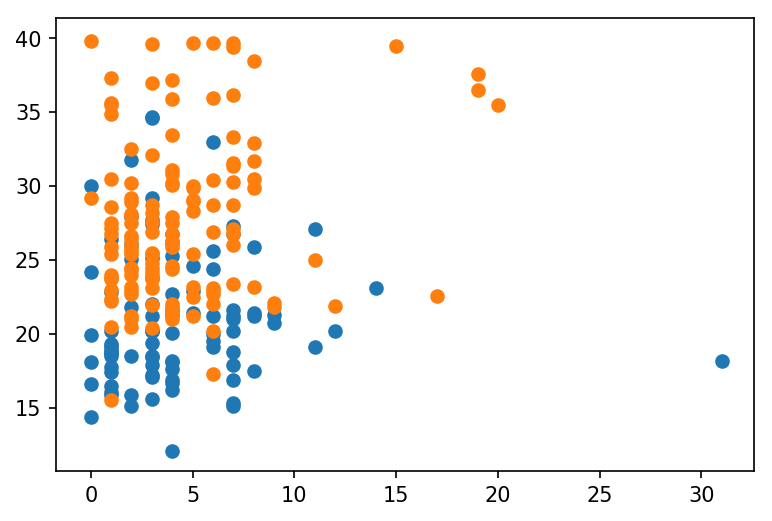

In [16]:
var = 'DaysSinceSymptomOnset'
sl_mfrac = sl_data.isnull().sum() / len(sl_data)
lb_mfrac = lb_data.isnull().sum() / len(lb_data)

print(sl_mfrac[var])
print(lb_mfrac[var])

x = sl_data[var]
y = sl_data['cycletime']
plt.scatter(x, y)

x = lb_data[var]
y = lb_data['cycletime']
plt.scatter(x, y)

0.5787671232876712
0.016853932584269662


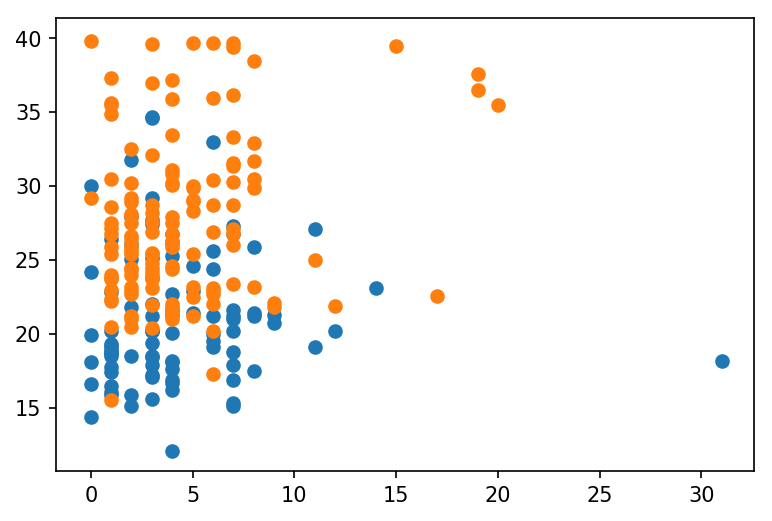

In [17]:
var = 'ReferralTime'
sl_mfrac = sl_data.isnull().sum() / len(sl_data)
lb_mfrac = lb_data.isnull().sum() / len(lb_data)

print(sl_mfrac[var])
print(lb_mfrac[var])


# print(sl_data['DaysSinceSymptomFeverOnset'].describe())
# print(lb_data['DaysSinceSymptomFeverOnset'].describe())

x = sl_data[var]
y = sl_data['cycletime']
plt.scatter(x, y)

x = lb_data[var]
y = lb_data['cycletime']
plt.scatter(x, y)

0.5958904109589042
1.0


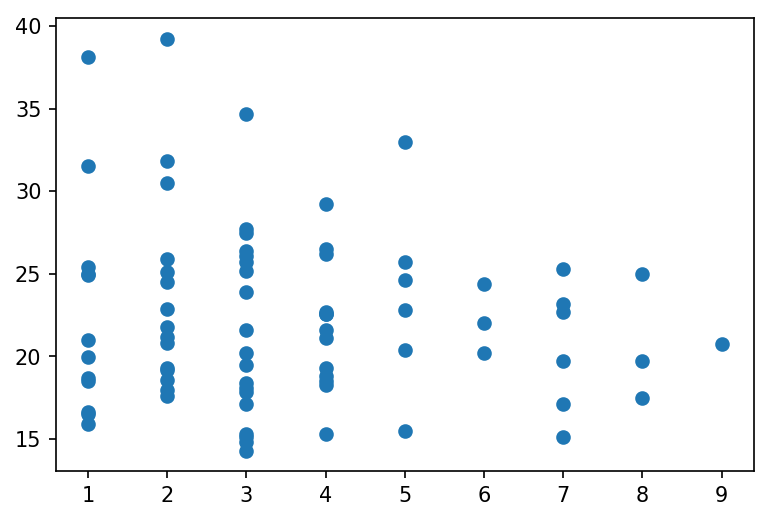

In [18]:
var = 'FeverNoDays'
sl_mfrac = sl_data.isnull().sum() / len(sl_data)
lb_mfrac = lb_data.isnull().sum() / len(lb_data)

print(sl_mfrac[var])
print(lb_mfrac[var])

x = sl_data[var]
y = sl_data['cycletime']
plt.scatter(x, y)

x = lb_data[var]
y = lb_data['cycletime']
plt.scatter(x, y)

The plots above show a difference between the dependency getween CT and DSSO, with a correlation in the case of the Sierra Leone data. The plots below show this more clearly:

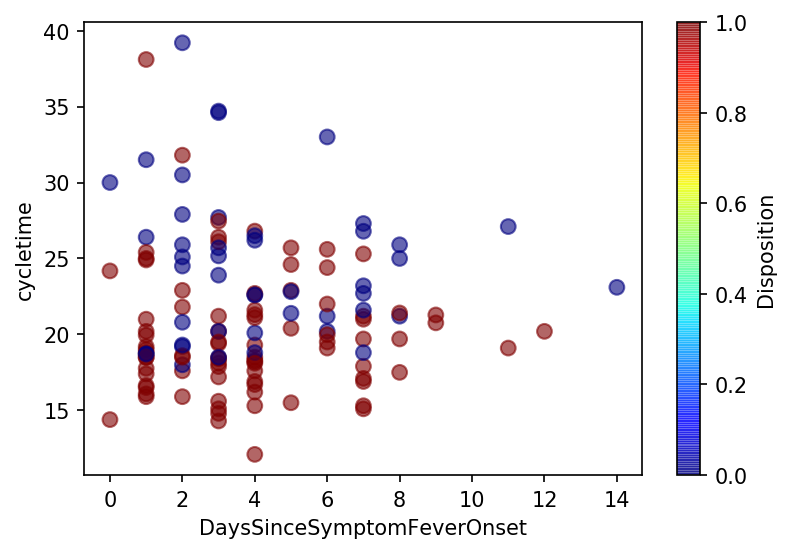

In [19]:
var = 'DaysSinceSymptomFeverOnset'
dat = sl_data[sl_data[var] < 20]

fig,ax1=plt.subplots()
dat.plot.scatter(x=var, y='cycletime', c='Disposition', s=50, alpha=0.6, colormap='jet', ax=ax1)
plt.savefig(join(out_path, 'symponset-ct-sl.pdf'))

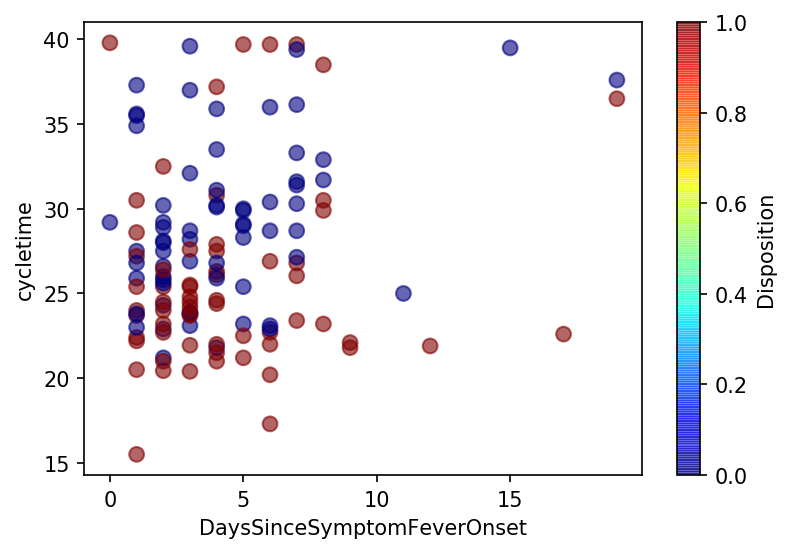

In [20]:
var = 'DaysSinceSymptomFeverOnset'
dat = lb_data[lb_data[var] < 20]

fig,ax1=plt.subplots()
dat.plot.scatter(x=var, y='cycletime', c='Disposition', s=50, alpha=0.6, colormap='jet', ax=ax1)
plt.savefig(join(out_path, 'symponset-ct-lb.pdf'))

Let's look if the values of DSSO have an effect on the missingness of CT:

In [21]:
dsso = 'DaysSinceSymptomFeverOnset'
ct = 'cycletime'
dat = sl_data[sl_data[dsso].notna()]
miss = dat[ct].isna()

print("Sierra Leone Data - Association between missingness of CT and values of DSSO")
r, pvalue = pointbiserialr(miss, dat[var])
print(r, pvalue)

Sierra Leone Data - Association between missingness of CT and values of DSSO
-0.06207784496047561 0.3973807299657619


In [22]:
dsso = 'DaysSinceSymptomFeverOnset'
ct = 'cycletime'
dat = lb_data[lb_data[dsso].notna()]
miss = dat[ct].isna()

print("Liberia Data - Association between missingness of CT and values of DSSO")
r, pvalue = pointbiserialr(miss, dat[var])
print(r, pvalue)

Liberia Data - Association between missingness of CT and values of DSSO
-0.0333281374996437 0.6624153082936468


Not really. Now, let's look if there is association between missingness in CT and DSSO, in the Sierra Leone and Liberia data separately:

In [23]:
dsso = 'DaysSinceSymptomFeverOnset'
ct = 'cycletime'
dat = sl_data

x00 = len(dat[(dat[ct].isna()) & (dat[dsso].isna())])
x10 = len(dat[(dat[ct].notna()) & (dat[dsso].isna())])
x01 = len(dat[(dat[ct].isna()) & (dat[dsso].notna())])
x11 = len(dat[(dat[ct].notna()) & (dat[dsso].notna())])

table = [[x00, x01], [x10, x11]]

chi2, pval1, dof, ex = chi2_contingency(table, correction=True)

oddsr, pval2 = fisher_exact(table)

print("Sierra Leone Data - Association between missingness of CT and DSSO")
print("Chi Square test:", chi2, pval1)
print("Fisher Exact test:", oddsr, pval2)

Sierra Leone Data - Association between missingness of CT and DSSO
Chi Square test: 1.8029838308681403 0.17935218245882917
Fisher Exact test: 1.4665523156089193 0.14862721215902852


In [24]:
dsso = 'DaysSinceSymptomFeverOnset'
ct = 'cycletime'
dat = lb_data

x00 = len(dat[(dat[ct].isna()) & (dat[dsso].isna())])
x10 = len(dat[(dat[ct].notna()) & (dat[dsso].isna())])
x01 = len(dat[(dat[ct].isna()) & (dat[dsso].notna())])
x11 = len(dat[(dat[ct].notna()) & (dat[dsso].notna())])

table = [[x00, x01], [x10, x11]]

chi2, pval1, dof, ex = chi2_contingency(table, correction=True)

oddsr, pval2 = fisher_exact(table)

print("Liberia Data - Association between missingness of CT and DSSO")
print("Chi Square test:", chi2, pval1)
print("Fisher Exact test:", oddsr, pval2)

Liberia Data - Association between missingness of CT and DSSO
Chi Square test: 0.290158424575591 0.5901190259796347
Fisher Exact test: 0.9555555555555556 1.0


There seems to be some weak association between missingness in CT and DSSO for the Sierra Leone data.